1. Data Definition

- Training dataset and Test dataset

- Composition of Training dataset

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]]) # 공부 시간
y_train = torch.FloatTensor([[2],[4],[6]]) # 맵핑되는 점수

2. Hypothesis 수립

  y = Wx + b

  H(x) = Wx + b (W: 가중치, b: 편향)

3. 비용함수에 대한 이해

  비용함수 cost function = 손실함수 loss function = 오차함수 error function = 목적함수 objective function

  평균 제곱 오차 Mean Squared Error, MSE를 비용함수로 재정의

  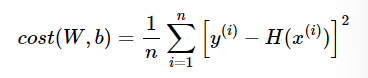

4. 옵티마이저 - Gradient Descent

  비용한수 값을 최소로 하는 W, b 찾는 데 사용되는 것 -> 옵티마이저

  y = Wx : W가 지나치게 크거나 작으면 오차 확연히 증가하므로, cost가 최소가 되는 값을 찾아야 한다. 이는 접선의 기울기가 0이 됨을 의미한다.

  학습률 : W의 값을 변경할 때 얼마나 크게 변경할지를 의미한다.

5. PyTorch로 linear regresstion 구현

- 기본 셋팅

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

- 변수 선언

In [3]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [4]:
x_train

tensor([[1.],
        [2.],
        [3.]])

In [5]:
x_train.shape

torch.Size([3, 1])

- 가중치와 편향의 초기화 : 0으로 초기화 y = 0x + 0

In [8]:
W = torch.zeros(1, requires_grad = True) # requres_grad = True : 학습을 통해 계속 값이 변경되는 변수

In [9]:
b = torch.zeros(1, requires_grad = True)

- hypothesis : H(x) = Wx + b

In [11]:
h = x_train * W + b

- 비용함수 선언

In [12]:
cost = torch.mean((h - y_train)**2)
cost

tensor(18.6667, grad_fn=<MeanBackward0>)

- 경사 하강법 구현

In [13]:
optimizer = optim.SGD([W,b],lr=0.01) # SGD : 경사하강법의 일종

In [ ]:
optimizer.zero_grad() # 기울기 0으로 초기화
cost.backward() # 기울기 계산
optimizer.step() # 학습률 적용

- 경사하강법 반복

In [14]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999
for epoch in range(nb_epochs + 1):
  h = x_train * W + b
  cost = torch.mean((h - y_train)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

6. optimizer.zero_grad() 필요한 이유 : 파이토치는 미분을 통해 얻은 기울기를 이전 계산된 기울기 값에 누적하는 특징이 있기 때문이다.
